<a href="https://colab.research.google.com/github/jhlee508/Colab/blob/master/monodepth2_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import cv2
import matplotlib.pyplot as plt

In [2]:
%cd /content
!git clone https://github.com/nianticlabs/monodepth2.git

/content
Cloning into 'monodepth2'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 168 (delta 5), reused 14 (delta 5), pack-reused 148
Receiving objects: 100% (168/168), 10.27 MiB | 19.34 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [189]:
%cd /content/monodepth2/

!python test_simple.py --image_path /content/2car.png --model_name mono+stereo_640x192

/content/monodepth2
-> Loading model from  models/mono+stereo_640x192
   Loading pretrained encoder
   Loading pretrained decoder
-> Predicting on 1 test images
   Processed 1 of 1 images - saved predictions to:
   - /content/2car_disp.jpeg
   - /content/2car_disp.npy
-> Done!


# Road Image

# 2m Image

(1440, 1440)


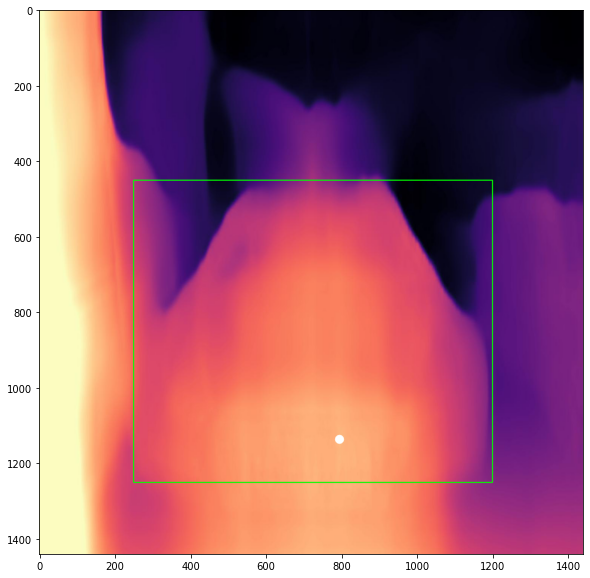

In [105]:
depth_image_PIL = Image.open('/content/2m_disp.jpeg')

# 이미지 크기 출력
print(depth_image_PIL.size)

pt1_1 = (250, 450)
pt1_2 = (1200, 1250)

box_image = np.array(depth_image_PIL)
box_image = cv2.rectangle(box_image, pt1=pt1_1, pt2=pt1_2, color=(0,255,0), thickness=2)
box_image = cv2.circle(box_image,(795, 1136), 2, (255, 255, 255), 20)

# 이미지 출력
plt.figure(figsize=(12, 10))
plt.imshow(box_image)
plt.show()

In [62]:
np_val_2m = np.load('/content/np_val_2m.npy')
np_val_2m.shape

(1440, 1440)

In [63]:
np_val_2m.min()

0.025486032

In [64]:
np_val_2m.max()

0.23231453

In [65]:
# Ground Distance (Threshold)
Ground_val = 100;
Ground_x = 0;
Ground_y = 0;

for y in range(np_val_2m.shape[0]):
    for x in range(np_val_2m.shape[1]):
            if np_val_2m[y][x] < Ground_val:
                Ground_val = np_val_2m[y][x]
                Ground_x = x;
                Ground_y = y;

            
print("Ground Point:", (Ground_y, Ground_x))
print("Ground Pixel Sum:", Ground_val)
print("Ground Pixel Value:", np_val_2m[Ground_y, Ground_x])

Ground Point: (0, 1396)
Ground Pixel Sum: 0.025486032
Ground Pixel Value: 0.025486032


In [70]:
pt1_1 = (250, 450)
pt1_2 = (1200, 1250)

min_val = 0;
min_x = 0;
min_y = 0;

for y in range(pt1_1[1], pt1_2[1]+1):
    for x in range(pt1_1[0], pt1_2[0]+1):
        if np_val_2m[y][x] > min_val:
            min_val = np_val_2m[y][x]
            min_x = x;
            min_y = y;
            
print("Brightest Point:", (min_y, min_x))
print("Brightest Pixel Sum:", min_val)
print("Brightest Pixel Value:", np_val_2m[min_y][min_x])

Brightest Point: (1136, 795)
Brightest Pixel Sum: 0.15021245
Brightest Pixel Value: 0.15021245


# 4m Image

(1440, 1440)


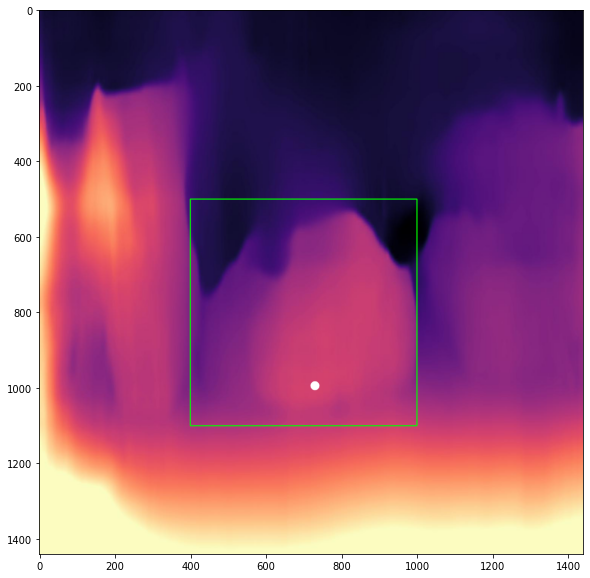

In [106]:
depth_image_PIL = Image.open('/content/4m_disp.jpeg')

# 이미지 크기 출력
print(depth_image_PIL.size)

pt1_1 = (400, 500)
pt1_2 = (1000, 1100)

box_image = np.array(depth_image_PIL)
box_image = cv2.rectangle(box_image, pt1=pt1_1, pt2=pt1_2, color=(0,255,0), thickness=2)
box_image = cv2.circle(box_image,(730, 994), 2, (255, 255, 255), 20)

# 이미지 출력
plt.figure(figsize=(12, 10))
plt.imshow(box_image)
plt.show()

In [74]:
np_val_4m = np.load('/content/np_val_4m.npy')
np_val_4m.shape

(1440, 1440)

In [75]:
np_val_4m.min()

0.019917034

In [76]:
np_val_4m.max()

0.1312845

In [78]:
# Ground Distance (Threshold)
Ground_val = 100;
Ground_x = 0;
Ground_y = 0;

for y in range(np_val_4m.shape[0]):
    for x in range(np_val_4m.shape[1]):
            if np_val_4m[y][x] < Ground_val:
                Ground_val = np_val_4m[y][x]
                Ground_x = x;
                Ground_y = y;

            
print("Ground Point:", (Ground_y, Ground_x))
print("Ground Pixel Sum:", Ground_val)
print("Ground Pixel Value:", np_val_4m[Ground_y, Ground_x])

Ground Point: (0, 1396)
Ground Pixel Sum: 0.025486032
Ground Pixel Value: 0.025486032


In [80]:
pt1_1 = (400, 500)
pt1_2 = (1000, 1100)

min_val = 0;
min_x = 0;
min_y = 0;

for y in range(pt1_1[1], pt1_2[1]+1):
    for x in range(pt1_1[0], pt1_2[0]+1):
        if np_val_4m[y][x] > min_val:
            min_val = np_val_4m[y][x]
            min_x = x;
            min_y = y;
            
print("Brightest Point:", (min_y, min_x))
print("Brightest Pixel Sum:", min_val)
print("Brightest Pixel Value:", np_val_4m[min_y][min_x])

Brightest Point: (994, 730)
Brightest Pixel Sum: 0.06090589
Brightest Pixel Value: 0.06090589


# 8m Image

(1440, 1440)


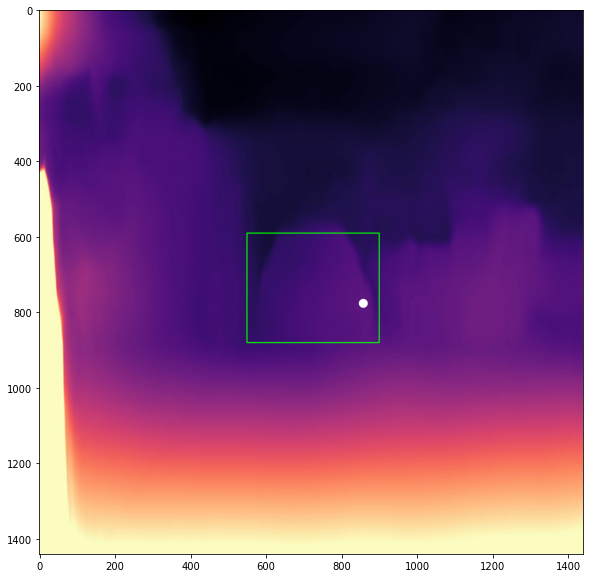

In [159]:
depth_image_PIL = Image.open('/content/8m_disp.jpeg')

# 이미지 크기 출력
print(depth_image_PIL.size)

pt1_1 = (550, 590)
pt1_2 = (900, 880)

box_image = np.array(depth_image_PIL)
box_image = cv2.rectangle(box_image, pt1=pt1_1, pt2=pt1_2, color=(0,255,0), thickness=2)
box_image = cv2.circle(box_image,(858, 776), 2, (255, 255, 255), 20)

# 이미지 출력
plt.figure(figsize=(12, 10))
plt.imshow(box_image)
plt.show()

In [154]:
np_val_8m = np.load('/content/np_val_8m.npy')
np_val_8m.shape

(1440, 1440)

In [155]:
np_val_8m.min()

0.015276785

In [156]:
np_val_8m.max()

0.17702389

In [157]:
# Ground Distance (Threshold)
Ground_val = 100;
Ground_x = 0;
Ground_y = 0;

for y in range(np_val_8m.shape[0]):
    for x in range(np_val_8m.shape[1]):
            if np_val_8m[y][x] < Ground_val:
                Ground_val = np_val_8m[y][x]
                Ground_x = x;
                Ground_y = y;

            
print("Ground Point:", (Ground_y, Ground_x))
print("Ground Pixel Sum:", Ground_val)
print("Ground Pixel Value:", np_val_8m[Ground_y, Ground_x])

Ground Point: (10, 419)
Ground Pixel Sum: 0.015276785
Ground Pixel Value: 0.015276785


In [158]:
pt1_1 = (550, 590)
pt1_2 = (900, 880)

min_val = 0;
min_x = 0;
min_y = 0;

for y in range(pt1_1[1], pt1_2[1]+1):
    for x in range(pt1_1[0], pt1_2[0]+1):
        if np_val_8m[y][x] > min_val:
            min_val = np_val_8m[y][x]
            min_x = x;
            min_y = y;
            
print("Brightest Point:", (min_y, min_x))
print("Brightest Pixel Sum:", min_val)
print("Brightest Pixel Value:", np_val_8m[min_y][min_x])

Brightest Point: (776, 858)
Brightest Pixel Sum: 0.036567185
Brightest Pixel Value: 0.036567185


# 거리에 따른 Numpy 값 확인(비례 관계)

In [160]:
x_8m = 858
y_8m = 766
x_4m = 730
y_4m = 994
x_2m = 795
y_2m = 1136

In [161]:
np_8m = np_val_8m[y_8m][x_8m]
np_8m

0.036401447

In [162]:
np_4m = np_val_4m[y_4m][x_4m]
np_4m

0.06090589

In [163]:
np_2m = np_val_2m[y_2m][x_2m]
np_2m

0.15021245

In [165]:
# 4m 대 8m의 numpy 값 차이
print(np_4m / np_8m, "배 차이")

1.6731722 배 차이


In [166]:
# 2m 대 4m의 numpy 값 차이
print(np_2m / np_4m, "배 차이")

2.4663043 배 차이


In [167]:
# 2m 대 8m의 numpy 값 차이
print(np_2m / np_8m, "배 차이")

4.1265516 배 차이


In [39]:
# (x, y)
pt1_1 = (150, 170)
pt1_2 = (390, 300)
pt2_1 = (440, 175)
pt2_2 = (580, 290)

In [41]:
# Point 1 Distance

min_val = 0;
min_x = 0;
min_y = 0;

for y in range(pt1_1[1], pt1_2[1]+1):
    for x in range(pt1_1[0], pt1_2[0]+1):
        if np_val[y][x] > min_val:
            min_val = np_val[y][x]
            min_x = x;
            min_y = y;
            
print("Brightest Point:", (min_y, min_x))
print("Brightest Pixel Sum:", min_val)
print("Brightest Pixel Value:", np_val[min_y][min_x])

Brightest Point: (300, 150)
Brightest Pixel Sum: 0.14310881
Brightest Pixel Value: 0.14310881


In [ ]:
# Point 2 Distance

min_val = 0;
min_x = 0;
min_y = 0;

for y in range(pt2_1[1], pt2_2[1]+1):
    for x in range(pt2_1[0], pt2_2[0]+1):
        if np_val[y][x] > min_val:
            min_val = np_val[y][x]
            min_x = x;
            min_y = y;
            
print("Brightest Point:", (min_y, min_x))
print("Brightest Pixel Sum:", min_val)
print("Brightest Pixel Value:", np_val[min_y][min_x])

Brightest Point: (263, 477)
Brightest Pixel Sum: 0.05734563
Brightest Pixel Value: 0.05734563


# PIL 이미지 처리

(720, 360)


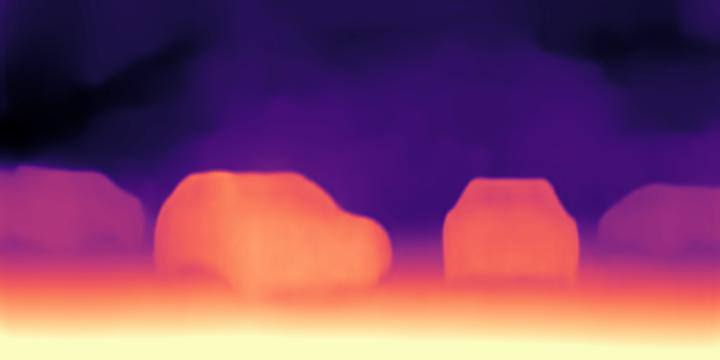

In [ ]:
depth_image_PIL = Image.open('/content/car1_disp.jpeg')

# 이미지 크기 출력
print(depth_image_PIL.size)
depth_image_PIL

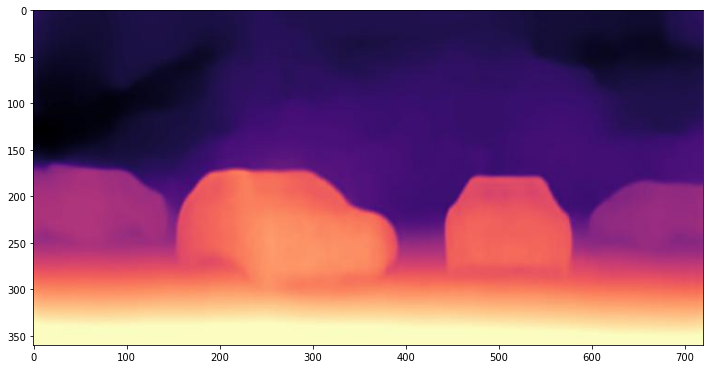

In [ ]:
depth_image = cv2.imread('/content/car1_disp.jpeg')
depth_image = cv2.cvtColor(depth_image, cv2.COLOR_BGR2RGB)

# 사이즈 지정
height, width, channel = depth_image.shape

# 이미지 출력
plt.figure(figsize=(12, 10))
plt.imshow(depth_image)
plt.show()

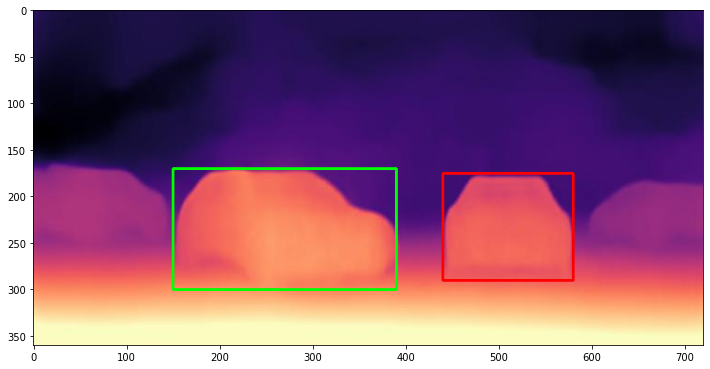

In [ ]:
pt1_1 = (150, 170)
pt1_2 = (390, 300)
pt2_1 = (440, 175)
pt2_2 = (580, 290)

box_image = np.array(depth_image)
box_image = cv2.rectangle(box_image, pt1=pt1_1, pt2=pt1_2, color=(0,255,0), thickness=2)
box_image = cv2.rectangle(box_image, pt1=pt2_1, pt2=pt2_2, color=(255,0,0), thickness=2)

# 이미지 출력
plt.figure(figsize=(12, 10))
plt.imshow(box_image)
plt.show()

In [ ]:
np.sum(depth_image[0, 0])

152

In [ ]:
# Ground Distance (Threshold)
Ground_val = 0;
Ground_x = 0;
Ground_y = 0;

for y in range(0, 50):
    for x in range(0, width):
            if np.sum(depth_image[y, x]) > Ground_val:
                Ground_val = np.sum(depth_image[y, x])
                Ground_x = x;
                Ground_y = y;

            
print("Ground Point:", (Ground_x, Ground_y))
print("Ground Pixel Sum:", Ground_val)
print("Ground Pixel Value:", depth_image[Ground_y, Ground_x])

Ground Point: (717, 8)
Ground Pixel Sum: 158
Ground Pixel Value: [45 18 95]


In [ ]:
# Point 1 Distance

min_val = 0;
min_x = 0;
min_y = 0;

for y in range(pt1_1[1], pt1_2[1]+1):
    for x in range(pt1_1[0], pt1_2[0]+1):
        if np.sum(depth_image[y, x]) > min_val:
            min_val = np.sum(depth_image[y, x])
            min_x = x;
            min_y = y;
            
print("Brightest Point:", (min_x, min_y))
print("Brightest Pixel Sum:", min_val)
print("Brightest Pixel Value:", depth_image[min_y, min_x])

Brightest Point: (253, 247)
Brightest Pixel Sum: 519
Brightest Pixel Value: [255 155 109]


In [ ]:
# Point 2 Distance

min_val = 0;
min_x = 0;
min_y = 0;

for y in range(pt2_1[1], pt2_y[1]+1):
    for x in range(pt2_x[0], pt2_y[0]+1):
        if np.sum(depth_image[y, x]) > min_val:
            min_val = np.sum(depth_image[y, x])
            min_x = x;
            min_y = y;
            
print("Brightest Point:", (min_x, min_y))
print("Brightest Pixel Sum:", min_val)
print("Brightest Pixel Value:", depth_image[min_y, min_x])

Brightest Point: (480, 265)
Brightest Pixel Sum: 451
Brightest Pixel Value: [248 108  95]


In [ ]:
import numpy as np
 
loaded_np = np.load('/content/car1_disp.npy')

In [ ]:
loaded_np.shape

(1, 1, 192, 640)

In [ ]:
type(loaded_np)

numpy.ndarray

In [ ]:
squeezed_np = np.squeeze(np.squeeze(loaded_np, axis=0), axis=0)

In [ ]:
squeezed_np = np.array(squeezed_np)

In [ ]:
squeezed_np.shape

(192, 640)

In [ ]:
multiplied_np = squeezed_np*255

In [ ]:
multiplied_np.shape

(192, 640)

In [ ]:
np.mean(multiplied_np)

94.48697

In [ ]:
np.max(multiplied_np)

238.77469

In [ ]:
np.min(multiplied_np)

12.2923

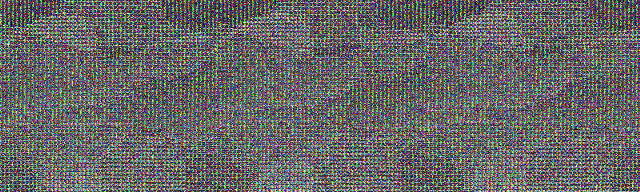

In [ ]:
pil_image=Image.fromarray(multiplied_np, 'RGB')
pil_image